### Bilinmeyen opponent
- Hafizasinda yoksa, advisorlar bakacak
 
*Advisor*
 - benim Cooperator olarak bildiklerimden, opponenti taniyan
 
### 4 farkli strateji
 - optimist   : opponent hakkinda en iyi tavsiye (impression)
 - pessimit   : .. en kotu ..
 - realist    : .. ortalama ..
 - no advisor : oynak (tanimiyorsa oynuyor)

In [16]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import timeit
import random

class memory_cell():
    def __init__(self):
        self.defect_number = 0
        self.play_number = 0
    def impression(self):
        return self.defect_number/max(1, self.play_number)
    
class agent():
    def __init__(self,ID, pc = 1, M = 1):
        self.ID, self.pc, self.M = ID, pc, M
        self.score, self.memory = 0, dict()
    def act(self):
        if np.random.rand() < self.pc:
            return 'C'
        return 'D'
    def learn(self, other, act):
        if other not in self.memory:
            self.forget()
            m = memory_cell()
            self.memory[other] = m
        if act == 'D' :
            self.memory[other].defect_number += 1
        self.memory[other].play_number += 1
        
    def forget(self):
        if len(self.memory) >= self.M:
            cooperators = [k for (k,v) in self.memory.items() if v.impression() < 0.5]
            if len(cooperators) > 0:
                del self.memory[random.choice(cooperators)]
            else:
                del self.memory[random.choice(list(self.memory.keys()))]
                
    def display(self):
        return [(k.ID, v.impression()) for (k,v) in self.memory.items()]
                
class abm():
    def __init__(self, N = 100, M = 10, time = 1000, payoff = {'CC':3,'CD':0,'DC':5,'DD':1}):
        self.N, self.time = N, time
        self.population = [agent(i, pc = np.random.rand(), M = M) for i in range(self.N)]
        self.payoff = payoff
        
    def world(self):
        for i in range(self.time):
            iA, iB = np.random.choice(range(self.N), 2, replace=False)
            A, B = self.population[iA], self.population[iB]
            
            # Decision to interact
            if B in A.memory:
                if A.memory[B].impression() > 0.5: continue
            if A in B.memory:
                if B.memory[A].impression() > 0.5: continue
            
            A_action, B_action = A.act(), B.act()
            A.learn(B, B_action)
            B.learn(A, A_action)

            A.score += self.payoff[A_action+B_action]
            B.score += self.payoff[B_action+A_action]
            
    def display(self):
        df = pd.DataFrame(columns=['ID','pC', 'score', 'Memory Length','Memory'])
        for A in self.population:
            df.loc[A.ID] = pd.Series({'ID':A.ID, 'pC':A.pc, 'score':A.score, 'Memory Length': len(A.display()),'Memory':A.display()})
        return df

In [17]:
sim = abm()
sim.world()
result = sim.display()
result.head(7)

,ID,pC,score,Memory Length,Memory
0,0,0.538039,41,10,"[(12, 0.0), (52, 1.0), (49, 1.0), (32, 1.0), (..."
1,1,0.619104,31,10,"[(91, 1.0), (96, 1.0), (56, 1.0), (25, 1.0), (..."
2,2,0.034266,62,10,"[(29, 0.0), (81, 1.0), (14, 1.0), (84, 1.0), (..."
3,3,0.125545,26,10,"[(16, 1.0), (6, 1.0), (97, 0.0), (7, 1.0), (48..."
4,4,0.493028,55,10,"[(69, 1.0), (94, 1.0), (42, 1.0), (25, 1.0), (..."
5,5,0.616528,19,10,"[(12, 0.0), (8, 1.0), (89, 1.0), (44, 1.0), (6..."
6,6,0.194922,43,10,"[(58, 1.0), (16, 1.0), (3, 1.0), (15, 1.0), (3..."


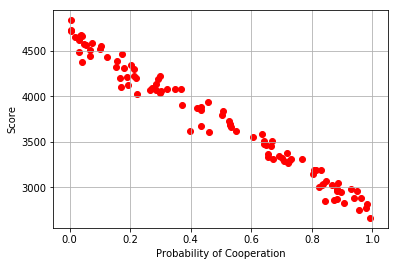

In [3]:
# Plot
plt.scatter(result.pC, result.score, color = 'red')
plt.xlabel('Probability of Cooperation');plt.ylabel('Score');
plt.grid()

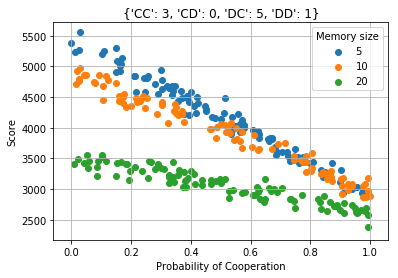

In [4]:
payoff = {'CC':3,'CD':0,'DC':5,'DD':1}
for m in [5, 10, 20]:
    sim = abm(M= m)
    sim.world()
    result = sim.display()
    plt.scatter(result.pC, result.score, label = str(m))
    plt.xlabel('Probability of Cooperation');plt.ylabel('Score');
    plt.legend(title="Memory size")
    plt.title(payoff)
    plt.grid() 

# remark
 - With greater memory (M=20), you do worse in the case of positive payoffs
 - Greater memory is not necessary when there is no danger

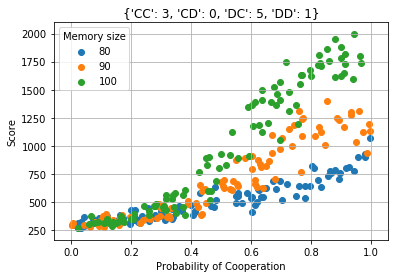

In [5]:
for m in [80,90,100]:
    sim = abm(M= m)
    sim.world()
    result = sim.display()
    plt.scatter(result.pC, result.score, label = str(m))
    plt.xlabel('Probability of Cooperation');plt.ylabel('Score');
    plt.legend(title="Memory size")
    plt.title(payoff)
    plt.grid() 

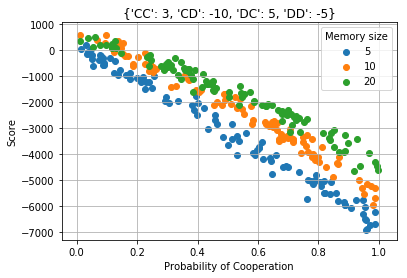

In [6]:
payoff = {'CC':3,'CD':-10,'DC':5,'DD':-5}
for m in [5, 10, 20]:
    sim = abm(M= m, payoff = payoff)
    sim.world()
    result = sim.display()
    plt.scatter(result.pC, result.score, label = str(m))
    plt.xlabel('Probability of Cooperation');plt.ylabel('Score');
    plt.legend(title="Memory size")
    plt.title(payoff)
    plt.grid() 

# remark
 - With greater memory (M=20), you do better in the case of negative payoffs
 - Greater memory is good in the case of danger

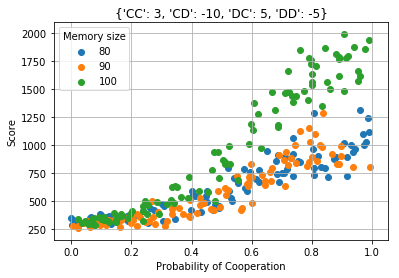

In [7]:
for m in [80,90,100]:
    sim = abm(M= m)
    sim.world()
    result = sim.display()
    plt.scatter(result.pC, result.score, label = str(m))
    plt.xlabel('Probability of Cooperation');plt.ylabel('Score');
    plt.legend(title="Memory size")
    plt.title(payoff)
    plt.grid() 